In [1]:
import matplotlib.pyplot as plt
import pandas as pd
TOP_COUNT = 3

In [2]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
#confirmed_df.head()

In [4]:
confirmed_df = confirmed_df.groupby("Country/Region").sum()
recovered_df = recovered_df.groupby("Country/Region").sum()
deaths_df = deaths_df.groupby("Country/Region").sum()

In [5]:
confirmed_df = confirmed_df.drop(columns=["Lat", "Long"])
recovered_df = recovered_df.drop(columns=["Lat", "Long"])
deaths_df = deaths_df.drop(columns=["Lat", "Long"])

In [6]:
confirmed_df = confirmed_df.sort_values(confirmed_df.columns[-1], ascending=False)
recovered_df = recovered_df.sort_values(recovered_df.columns[-1], ascending=False)
deaths_df = deaths_df.sort_values(deaths_df.columns[-1], ascending=False)

In [7]:
#confirmed_df.head()

In [8]:
# confirmed must go last
start = 0
end = TOP_COUNT
recovered_df = recovered_df.loc[confirmed_df.iloc[start:end].index.values].T
deaths_df = deaths_df.loc[confirmed_df.iloc[start:end].index.values].T
confirmed_df = confirmed_df.loc[confirmed_df.iloc[start:end].index.values].T

In [9]:
confirmed_df.columns = confirmed_df.columns + "_Confirmed"
recovered_df.columns = recovered_df.columns + "_Recovered"
deaths_df.columns = deaths_df.columns + "_Deaths"

In [10]:
confirmed_df.index = pd.to_datetime(confirmed_df.index)
recovered_df.index = pd.to_datetime(recovered_df.index)
deaths_df.index = pd.to_datetime(deaths_df.index)

In [11]:
#confirmed_df.head()

In [12]:
# View data over last 20 days
confirmed_df.merge(recovered_df, left_index=True, right_index=True) \
    .merge(deaths_df, left_index=True, right_index=True).tail(20)

Country/Region,US_Confirmed,Spain_Confirmed,Italy_Confirmed,US_Recovered,Spain_Recovered,Italy_Recovered,US_Deaths,Spain_Deaths,Italy_Deaths
2020-03-21,25600,25374,53578,176,2125,6072,307,1375,4825
2020-03-22,33276,28768,59138,178,2575,7024,417,1772,5476
2020-03-23,43847,35136,63927,178,2575,7024,557,2311,6077
2020-03-24,53740,39885,69176,348,3794,8326,706,2808,6820
2020-03-25,65778,49515,74386,361,5367,9362,942,3647,7503
2020-03-26,83836,57786,80589,681,7015,10361,1209,4365,8215
2020-03-27,101657,65719,86498,869,9357,10950,1581,5138,9134
2020-03-28,121465,73235,92472,1072,12285,12384,2026,5982,10023
2020-03-29,140909,80110,97689,2665,14709,13030,2467,6803,10779
2020-03-30,161831,87956,101739,5644,16780,14620,2978,7716,11591


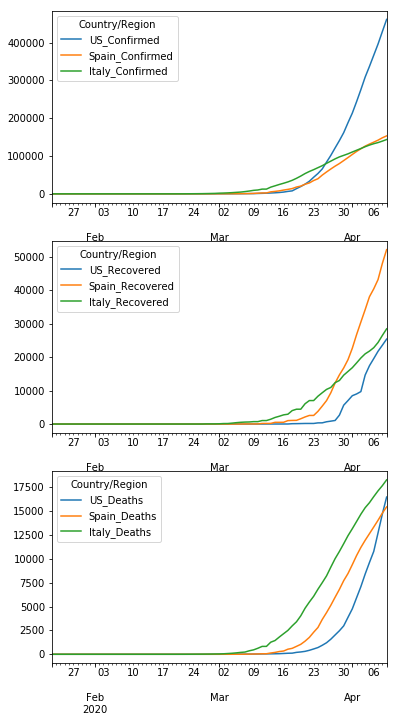

In [13]:
_, axis = plt.subplots(nrows=3, figsize=(6,12))
confirmed_df.plot(ax=axis[0])
recovered_df.plot(ax=axis[1])
deaths_df.plot(ax=axis[2])
plt.show()